In [149]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [150]:
import pandas as pd
SOURCE = '../notebooks/kc_house_data.csv'
df = pd.read_csv(SOURCE)

In [151]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [152]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.369454,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.907964,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [153]:
df.describe(exclude='number')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [154]:
# import pandas_profiling
# pandas_profiling.ProfileReport(df)

In [155]:
from sklearn.model_selection import train_test_split
# Train/Test split
traintest = df.copy()
id = df['id'].unique()
train_id, test_id = train_test_split(id, random_state=42, test_size=.1)

train = traintest[traintest['id'].isin(train_id)]
test = traintest[traintest['id'].isin(test_id)]
train.shape, test.shape

((19449, 21), (2164, 21))

In [156]:
# Wrangle function
def wrangle(X):
    X = X.copy()
    
#     engineer date features
   
    X = X.drop(columns =['date', 'view', 'lat', 'long', 'yr_renovated','sqft_lot15', 'sqft_living15'])
    
    return X
train = wrangle(train)
test = wrangle(test)



In [157]:
y_val.shape, y_pred.shape


((4863,), (2164,))

In [158]:
import numpy as np

target = 'price'
X_train = train.drop(columns = [target,'id'])
y_train = train[target]
X_test = test.drop(columns=[target, 'id'])
y_test = test[target]

# Log transformation of target vector
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)



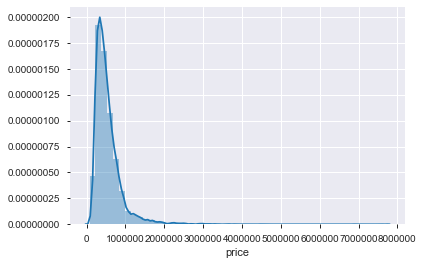

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.distplot(y_train)

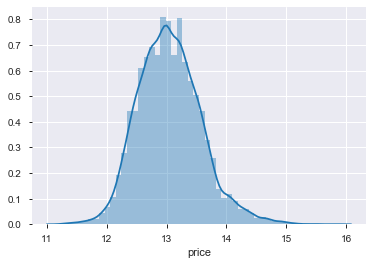

In [160]:
sns.distplot(y_train_log)

In [169]:
trainval = train.copy()
train, val = train_test_split(trainval)
X_train = train.drop(columns=[target, 'id'])
y_train = train[target]
y_train_log = np.log1p(y_train)
X_val = val.drop(columns=[target, 'id'])
y_val = val[target]
y_val_log = np.log1p(y_val)

# baseline
y_pred=np.full_like(y_val, fill_value=y_train.mean())
print('Validation RMSLE, Mean Baseline:', rmsle(y_val, y_pred))
print('RMSE:', rmse(y_val, y_pred))

Validation RMSLE, Mean Baseline: 0.5462684918395788
RMSE: 371906.29452567955


In [162]:
# XGBRegressor wih early stopping rounds
import warnings
import category_encoders as ce
from xgboost import XGBRegressor
warnings.simplefilter(action='ignore', category=FutureWarning)

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

eval_set = [(X_train_encoded, y_train_log), 
            (X_val_encoded, y_val_log)]

model = XGBRegressor(n_estimators=1000, n_jobs=-1, random_state=42)
model.fit(X_train_encoded, y_train_log, eval_set=eval_set, eval_metric='rmse', 
          early_stopping_rounds=10)

[13:59:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:11.308	validation_1-rmse:11.3
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:10.1789	validation_1-rmse:10.1711
[2]	validation_0-rmse:9.16279	validation_1-rmse:9.15523
[3]	validation_0-rmse:8.24841	validation_1-rmse:8.24075
[4]	validation_0-rmse:7.42558	validation_1-rmse:7.41807
[5]	validation_0-rmse:6.68513	validation_1-rmse:6.67756
[6]	validation_0-rmse:6.01886	validation_1-rmse:6.01147
[7]	validation_0-rmse:5.41931	validation_1-rmse:5.41199
[8]	validation_0-rmse:4.87987	validation_1-rmse:4.8726
[9]	validation_0-rmse:4.39454	validation_1-rmse:4.38737
[10]	validation_0-rmse:3.95795	validation_1-rmse:3.95101
[11]	validation_0-rmse:3.56518	validation_1-rmse:3.55834
[12]	validation_0-rmse:3.21197	validation_1-rmse:3.20472

[136]	validation_0-rmse:0.215139	validation_1-rmse:0.219117
[137]	validation_0-rmse:0.215051	validation_1-rmse:0.219081
[138]	validation_0-rmse:0.214768	validation_1-rmse:0.218752
[139]	validation_0-rmse:0.213984	validation_1-rmse:0.217982
[140]	validation_0-rmse:0.213878	validation_1-rmse:0.21795
[141]	validation_0-rmse:0.213772	validation_1-rmse:0.217863
[142]	validation_0-rmse:0.213449	validation_1-rmse:0.217623
[143]	validation_0-rmse:0.212887	validation_1-rmse:0.217028
[144]	validation_0-rmse:0.212748	validation_1-rmse:0.216968
[145]	validation_0-rmse:0.212505	validation_1-rmse:0.216693
[146]	validation_0-rmse:0.212406	validation_1-rmse:0.216625
[147]	validation_0-rmse:0.212342	validation_1-rmse:0.216603
[148]	validation_0-rmse:0.212236	validation_1-rmse:0.216475
[149]	validation_0-rmse:0.211474	validation_1-rmse:0.215639
[150]	validation_0-rmse:0.211272	validation_1-rmse:0.215406
[151]	validation_0-rmse:0.210547	validation_1-rmse:0.214808
[152]	validation_0-rmse:0.210296	validati

[273]	validation_0-rmse:0.187878	validation_1-rmse:0.1974
[274]	validation_0-rmse:0.18783	validation_1-rmse:0.197366
[275]	validation_0-rmse:0.187403	validation_1-rmse:0.197037
[276]	validation_0-rmse:0.187316	validation_1-rmse:0.196972
[277]	validation_0-rmse:0.187196	validation_1-rmse:0.196833
[278]	validation_0-rmse:0.187136	validation_1-rmse:0.19683
[279]	validation_0-rmse:0.187068	validation_1-rmse:0.19684
[280]	validation_0-rmse:0.186983	validation_1-rmse:0.196805
[281]	validation_0-rmse:0.186901	validation_1-rmse:0.196766
[282]	validation_0-rmse:0.186653	validation_1-rmse:0.196497
[283]	validation_0-rmse:0.186604	validation_1-rmse:0.19647
[284]	validation_0-rmse:0.186521	validation_1-rmse:0.196442
[285]	validation_0-rmse:0.186422	validation_1-rmse:0.196328
[286]	validation_0-rmse:0.186367	validation_1-rmse:0.196274
[287]	validation_0-rmse:0.186248	validation_1-rmse:0.196256
[288]	validation_0-rmse:0.186183	validation_1-rmse:0.196236
[289]	validation_0-rmse:0.186159	validation_1-

[410]	validation_0-rmse:0.17626	validation_1-rmse:0.190211
[411]	validation_0-rmse:0.176231	validation_1-rmse:0.190198
[412]	validation_0-rmse:0.176081	validation_1-rmse:0.190097
[413]	validation_0-rmse:0.176024	validation_1-rmse:0.190039
[414]	validation_0-rmse:0.175976	validation_1-rmse:0.190022
[415]	validation_0-rmse:0.175942	validation_1-rmse:0.190003
[416]	validation_0-rmse:0.175889	validation_1-rmse:0.190001
[417]	validation_0-rmse:0.175849	validation_1-rmse:0.190008
[418]	validation_0-rmse:0.175792	validation_1-rmse:0.189955
[419]	validation_0-rmse:0.175711	validation_1-rmse:0.189873
[420]	validation_0-rmse:0.175665	validation_1-rmse:0.189867
[421]	validation_0-rmse:0.175634	validation_1-rmse:0.189837
[422]	validation_0-rmse:0.175616	validation_1-rmse:0.189822
[423]	validation_0-rmse:0.175581	validation_1-rmse:0.189799
[424]	validation_0-rmse:0.175523	validation_1-rmse:0.189756
[425]	validation_0-rmse:0.17549	validation_1-rmse:0.189748
[426]	validation_0-rmse:0.17547	validation

[547]	validation_0-rmse:0.16972	validation_1-rmse:0.187336
[548]	validation_0-rmse:0.169616	validation_1-rmse:0.187266
[549]	validation_0-rmse:0.169578	validation_1-rmse:0.18723
[550]	validation_0-rmse:0.169553	validation_1-rmse:0.187197
[551]	validation_0-rmse:0.169532	validation_1-rmse:0.187192
[552]	validation_0-rmse:0.169504	validation_1-rmse:0.187197
[553]	validation_0-rmse:0.169469	validation_1-rmse:0.187168
[554]	validation_0-rmse:0.169376	validation_1-rmse:0.18712
[555]	validation_0-rmse:0.169333	validation_1-rmse:0.18709
[556]	validation_0-rmse:0.169295	validation_1-rmse:0.187065
[557]	validation_0-rmse:0.169247	validation_1-rmse:0.18705
[558]	validation_0-rmse:0.169211	validation_1-rmse:0.18705
[559]	validation_0-rmse:0.169185	validation_1-rmse:0.187026
[560]	validation_0-rmse:0.169148	validation_1-rmse:0.187017
[561]	validation_0-rmse:0.169108	validation_1-rmse:0.18696
[562]	validation_0-rmse:0.16908	validation_1-rmse:0.186935
[563]	validation_0-rmse:0.169016	validation_1-rm

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [163]:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(model, scoring='neg_mean_squared_error', 
                                 cv='prefit', n_iter=2, random_state=42)

permuter.fit(X_train_encoded, y_train_log)
feature_names = X_train_encoded.columns.tolist()
show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.1453 ± 0.0002,zipcode
0.0737 ± 0.0002,sqft_living
0.0557 ± 0.0012,grade
0.0115 ± 0.0002,yr_built
0.0089 ± 0.0001,sqft_lot
0.0063 ± 0.0001,waterfront
0.0031 ± 0.0001,condition
0.0029 ± 0.0001,sqft_above
0.0028 ± 0.0001,bathrooms
0.0017 ± 0.0001,sqft_basement


In [174]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(ce.OrdinalEncoder(),
            XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=645,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
)
pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_val)
rmse(y_val_log, y_pred_log)


[17:24:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.18733858671093892

In [176]:
y_pred_log = pipeline.predict(X_test)
y_pred=np.expm1(y_pred_log)

In [177]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

print('Test RMSLE:', rmse(y_test_log, y_pred_log))

Test RMSLE: 0.18611128901492566


In [181]:
y_pred = np.expm1(y_pred_log)
print('Test RMSE:',rmse(y_test, y_pred))

Test RMSE: 118068.74135889622


In [166]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_pred,y_test))

0.8704761671690111


In [182]:
from joblib import dump
dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

In [ ]:
# def predict(sqft,beds,baths):
#     df = pd.DataFrame(
#         columns=['sqft_living', 'bedrooms', 'bathrooms'],
#         data=[[sqft, beds, baths]]
#     )
#     y_pred=model.predict(df)[0]
#     return f'${y_pred:.0f}'

# predict(3000,4,4)